In [1]:
#installing libraries
import pandas as pd

In [2]:
trxn = pd.read_csv('Retail_Data_Transactions.csv')
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [4]:
df= trxn.merge(response,on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [5]:
#features
df.dtypes
df.shape
df.head()
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [6]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [7]:
#missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [8]:
(31/125000)*100

0.024800000000000003

In [9]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [10]:
#change dtypes

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15300\2185067595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15300\2185067595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']= df['response'].astype('int64')


In [11]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [12]:
set(df['response'])

{0, 1}

In [13]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [14]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['response']))

# Set a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = z_scores > threshold

# Print the DataFrame rows where 'response' is considered an outlier
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [15]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['tran_amount']))

# Set a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = z_scores > threshold

# Print the DataFrame rows where 'response' is considered an outlier
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


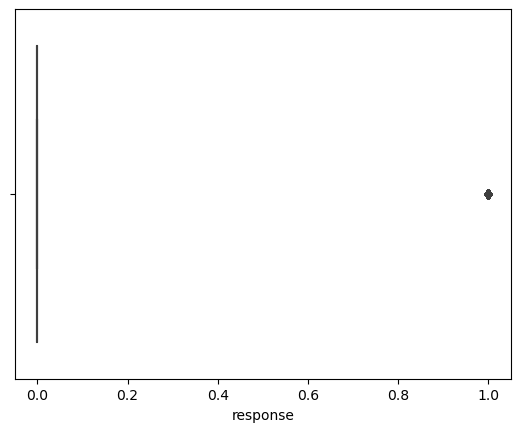

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'])
plt.show()

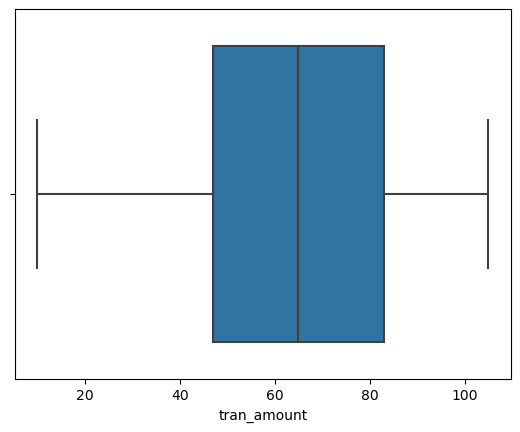

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create the box plot with the 'tran_amount' column
sns.boxplot(x=df['tran_amount'])
#plt.title('Box Plot of Transaction Amounts')
#plt.xlabel('Transaction Amount')
plt.show()

In [18]:
#creating new columns

df['month']= df['trans_date'].dt.month

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15300\3292341958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


In [19]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [20]:
# which 3 month have had the highest transaction value

monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [22]:
#customers having highest num of orders


customers_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']
customer_counts

#sort
#top_5_cus= customer_counts.sort_values(by='count',ascending=False).head(5)
#top_5_cus

NameError: name 'customer_counts' is not defined

In [23]:
#customers having highest num of orders


customers_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']
customer_counts

#sort
#top_5_cus= customer_counts.sort_values(by='count',ascending=False).head(5)
#top_5_cus

NameError: name 'customer_counts' is not defined

In [24]:
# Counting the number of orders per customer
customers_counts = df['customer_id'].value_counts().reset_index()

# Renaming the columns
customers_counts.columns = ['customer_id', 'count']

# Sorting to get the top 5 customers with the highest number of orders
top_5_cus = customers_counts.sort_values(by='count', ascending=False).head(5)

# Displaying the result
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

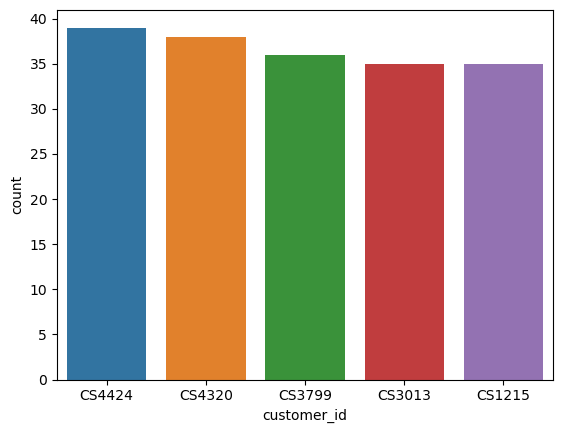

In [25]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [27]:
#customers having highest value of orders

customers_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
#customer_sales

#sort
top_5_sal= customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sal

NameError: name 'customer_sales' is not defined

In [28]:
#customers having highest value of orders

customers_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
#customer_sales

#sort
top_5_sal= customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sal

NameError: name 'customer_sales' is not defined

In [29]:
# Calculate the total sales amount per customer
customers_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()

# Rename columns for clarity (if needed)
customers_sales.columns = ['customer_id', 'total_sales']

# Sort to get the top 5 customers with the highest total sales amount
top_5_sal = customers_sales.sort_values(by='total_sales', ascending=False).head(5)

# Display the result
top_5_sal

,customer_id,total_sales
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


In [31]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

ValueError: Could not interpret input 'tran_amount'

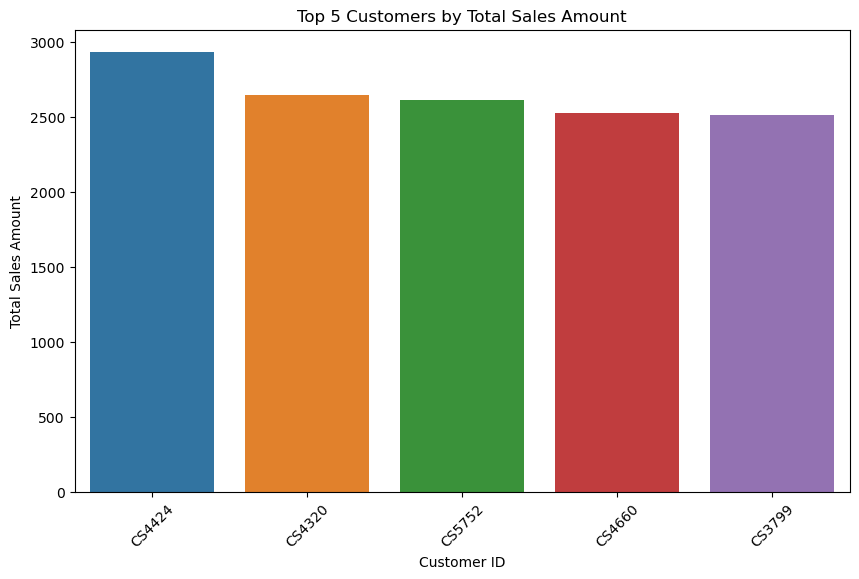

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total sales amount per customer
customers_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()

# Rename columns for clarity
customers_sales.columns = ['customer_id', 'total_sales']

# Sort to get the top 5 customers with the highest total sales amount
top_5_sal = customers_sales.sort_values(by='total_sales', ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='total_sales', data=top_5_sal)
plt.xlabel('Customer ID')
plt.ylabel('Total Sales Amount')
plt.title('Top 5 Customers by Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

# ADVANCE ANALYTICS

# TIME SERIES ANALYSIS

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15300\4242674290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['trans_date'].dt.to_period('M')


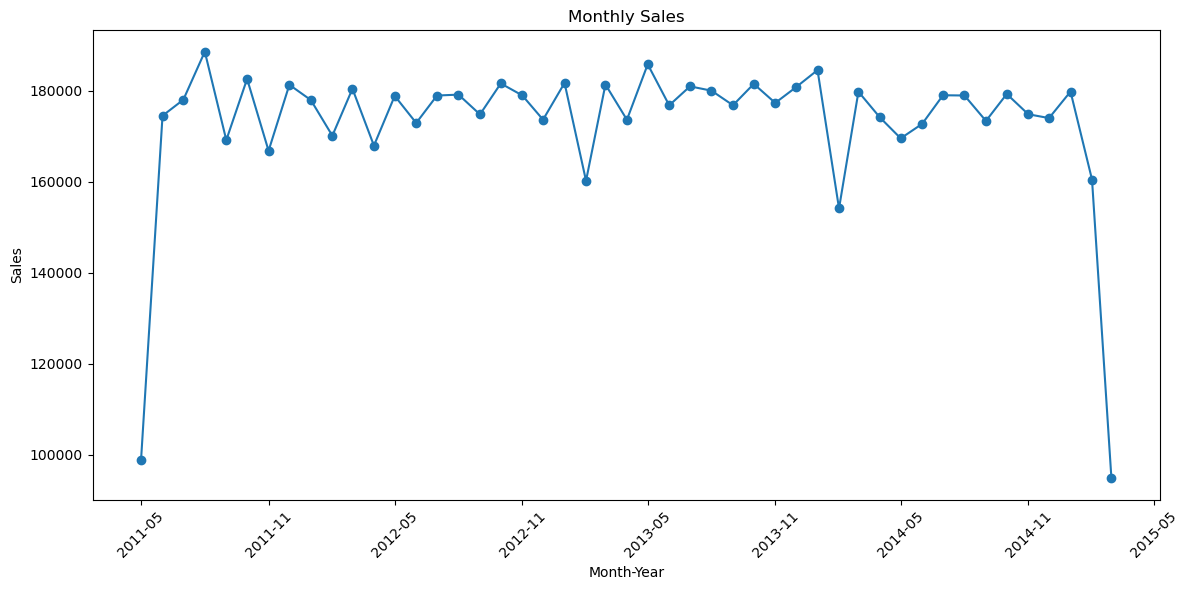

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [30]:
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Create a 'month_year' column
df['month_year'] = df['trans_date'].dt.to_period('M')

monthly_sales = df.groupby('month_year')['tran_amount'].sum()


monthly_sales.index= monthly_sales.index.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

# Formatting the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Adjust the interval as needed

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()



df

# COHORT SEGMENT

In [33]:
###cohort segment
#recency
recency= df.groupby('customer_id')['trans_date'].max()

#frequency
frequency= df.groupby('customer_id')['trans_date'].count()

#monetory
monetary= df.groupby('customer_id')['tran_amount'].sum()

#combine
rfm= pd.DataFrame({'recency':recency, 'frequency':frequency,'monetary':monetary})

In [34]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [35]:
# Convert 'recency' column to datetime format
rfm['recency'] = pd.to_datetime(rfm['recency'])

# Define the segmentation function
def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] < 15) and (500 <= row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

# Apply the function to the DataFrame
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [36]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


<Axes: >

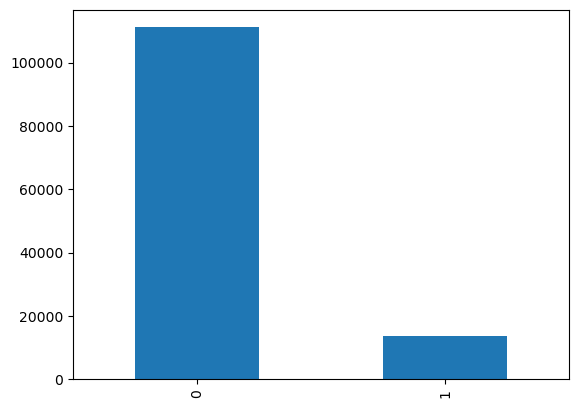

In [37]:
###churn analysis
#count the numbers of churned and active customers

churn_counts= df['response']. value_counts()

#plot
churn_counts.plot(kind='bar')

<Axes: xlabel='month_year'>

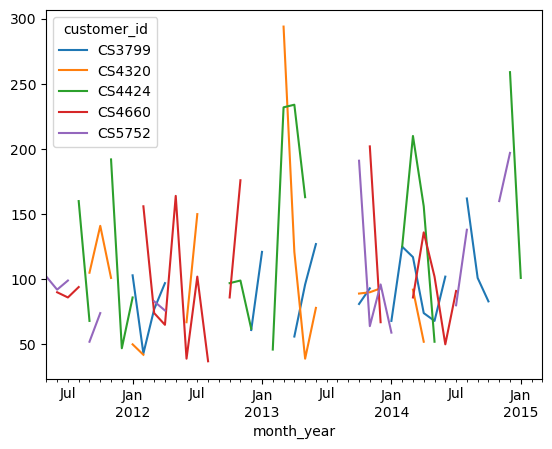

In [38]:
#analyzing top customers

top_5_cus= monetary.sort_values(ascending=False).head(5).index

top_customers_df= df[df['customer_id'].isin(top_5_cus)]

top_customer_sales= top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)

top_customer_sales.plot(kind='line')

In [39]:
df.to_csv('MainData.csv')

In [40]:
rfm.to_csv('AddAnlys.csv')